In [1]:
# -----------------------------------------------
# (1) Import Required Libraries
# -----------------------------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [5]:
# -----------------------------------------------
# (a) Print First 5 Rows
# -----------------------------------------------
df = pd.read_csv(R"E:\Developer's arena Internship\week5\Electronic_sales_Sep2023-Sep2024.csv")
print("FIRST 5 ROWS:")
print(df.head())

FIRST 5 ROWS:
   Customer ID  Age Gender Loyalty Member Product Type      SKU  Rating  \
0         1000   53   Male             No   Smartphone  SKU1004       2   
1         1000   53   Male             No       Tablet  SKU1002       3   
2         1002   41   Male             No       Laptop  SKU1005       3   
3         1002   41   Male            Yes   Smartphone  SKU1004       2   
4         1003   75   Male            Yes   Smartphone  SKU1001       5   

  Order Status Payment Method  Total Price  Unit Price  Quantity  \
0    Cancelled    Credit Card      5538.33      791.19         7   
1    Completed         Paypal       741.09      247.03         3   
2    Completed    Credit Card      1855.84      463.96         4   
3    Completed           Cash      3164.76      791.19         4   
4    Completed           Cash        41.50       20.75         2   

  Purchase Date Shipping Type              Add-ons Purchased  Add-on Total  
0    20-03-2024      Standard  Accessory,Accessor

In [7]:
# -----------------------------------------------
# (b) Clean the Data
# -----------------------------------------------

# Convert Purchase Date to datetime
df["Purchase Date"] = pd.to_datetime(df["Purchase Date"], format="%d-%m-%Y", errors="coerce")

# Fill missing values
df["Add-ons Purchased"].fillna("None", inplace=True)
df["Add-on Total"].fillna(0, inplace=True)

# Remove rows where Total Price or Unit Price is missing or zero
df = df[df["Total Price"] > 0]
df = df[df["Unit Price"] > 0]

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

print("\nDATA CLEANED SUCCESSFULLY!")


DATA CLEANED SUCCESSFULLY!


In [9]:
# -----------------------------------------------
# (c) Drop Customer ID and SKU
# -----------------------------------------------
df.drop(columns=["Customer ID", "SKU"], inplace=True)
print("\nDropped Customer ID & SKU")


Dropped Customer ID & SKU


In [11]:
df.head(5)

,Age,Gender,Loyalty Member,Product Type,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,53,Male,No,Smartphone,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,53,Male,No,Tablet,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,41,Male,No,Laptop,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,None,0.00
3,41,Male,Yes,Smartphone,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,75,Male,Yes,Smartphone,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [13]:
# -----------------------------------------------
# (d) Standardize Data & Handle Outliers
# -----------------------------------------------

# Select numerical columns
num_cols = ["Age", "Rating", "Total Price", "Unit Price", "Quantity", "Add-on Total"]

# --- Handle Outliers using IQR Method ---
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))

# --- Standardize using StandardScaler ---
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

print("\nStandardization Completed!")
print(df_scaled.head())


Standardization Completed!
        Age Gender Loyalty Member Product Type    Rating Order Status  \
0  0.222078   Male             No   Smartphone -0.893945    Cancelled   
1  0.222078   Male             No       Tablet -0.076773    Completed   
2 -0.443174   Male             No       Laptop -0.076773    Completed   
3 -0.443174   Male            Yes   Smartphone -0.893945    Completed   
4  1.441705   Male            Yes   Smartphone  1.557570    Completed   

  Payment Method  Total Price  Unit Price  Quantity Purchase Date  \
0    Credit Card     0.954103    0.680695  0.527539    2024-03-20   
1         Paypal    -0.971755   -1.061920 -0.865809    2024-04-20   
2    Credit Card    -0.524238   -0.367225 -0.517472    2023-10-17   
3           Cash     0.001230    0.680695 -0.517472    2024-08-09   
4           Cash    -1.252607   -1.786558 -1.214146    2024-05-21   

  Shipping Type              Add-ons Purchased  Add-on Total  
0      Standard  Accessory,Accessory,Accessory     -0.3

In [15]:
df.head(2)

,Age,Gender,Loyalty Member,Product Type,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,53.0,Male,No,Smartphone,2.0,Cancelled,Credit Card,5538.33,791.19,7.0,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,53.0,Male,No,Tablet,3.0,Completed,Paypal,741.09,247.03,3.0,2024-04-20,Overnight,Impulse Item,26.09


In [19]:
# -----------------------------------------------
# (e) Customer Sales Analysis
# -----------------------------------------------

# Reload original df with Customer ID for customer analysis
df2 = pd.read_csv("E:\Developer's arena Internship\week5\Electronic_sales_Sep2023-Sep2024.csv")

# Compute total spending per customer
customer_sales = df2.groupby("Customer ID")["Total Price"].sum().sort_values(ascending=False)

print("\nTOP 10 CUSTOMERS BY TOTAL SPEND:")
print(customer_sales.head(10))

# Buying frequency
customer_frequency = df2["Customer ID"].value_counts()

# Merge into a customer performance table
customer_dashboard = pd.DataFrame({
    "Total Spend": customer_sales,
    "Purchase Frequency": customer_frequency
}).fillna(0).sort_values("Total Spend", ascending=False)

print("\nCUSTOMER SALES DASHBOARD:")
print(customer_dashboard.head())


TOP 10 CUSTOMERS BY TOTAL SPEND:
Customer ID
16357    34563.70
16863    33035.92
13813    31830.16
11476    31077.61
12276    30961.18
13635    30260.36
12749    29394.56
15399    29084.88
12319    27352.32
19996    27296.78
Name: Total Price, dtype: float64

CUSTOMER SALES DASHBOARD:
             Total Spend  Purchase Frequency
Customer ID                                 
16357           34563.70                   7
16863           33035.92                   5
13813           31830.16                   5
11476           31077.61                   5
12276           30961.18                   6


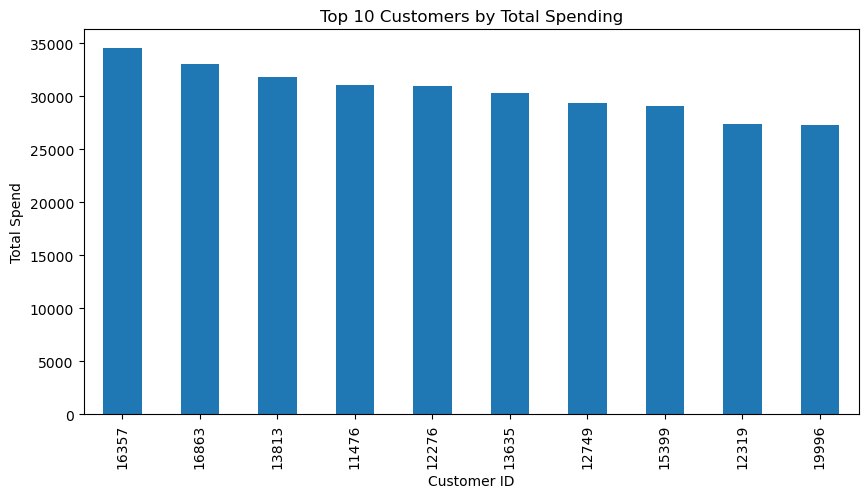

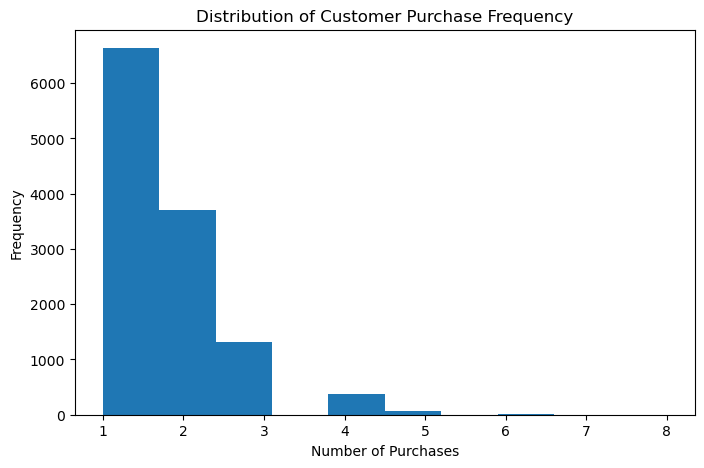

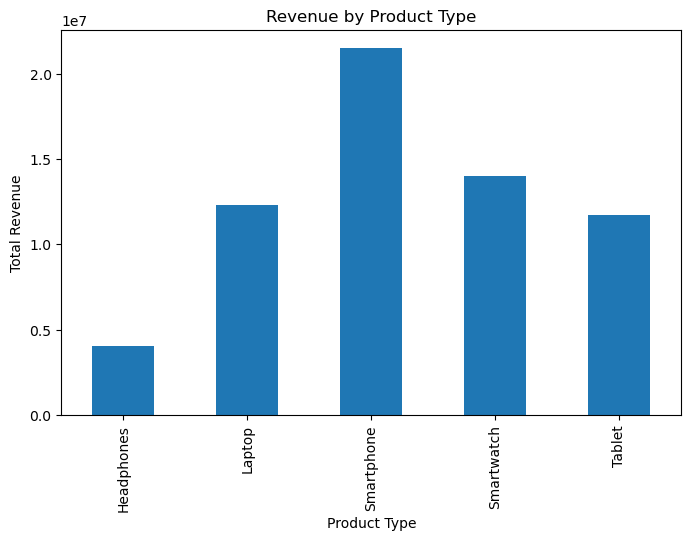


Dashboard Generated Successfully!


In [21]:
# -----------------------------------------------
# Visualization Dashboard
# -----------------------------------------------

# Plot 1: Top 10 Customers by Spending
plt.figure(figsize=(10,5))
customer_sales.head(10).plot(kind='bar')
plt.title("Top 10 Customers by Total Spending")
plt.xlabel("Customer ID")
plt.ylabel("Total Spend")
plt.show()

# Plot 2: Purchase Frequency Distribution
plt.figure(figsize=(8,5))
customer_frequency.plot(kind='hist', bins=10)
plt.title("Distribution of Customer Purchase Frequency")
plt.xlabel("Number of Purchases")
plt.show()

# Plot 3: Revenue by Product Type
product_sales = df2.groupby("Product Type")["Total Price"].sum()
plt.figure(figsize=(8,5))
product_sales.plot(kind='bar')
plt.title("Revenue by Product Type")
plt.ylabel("Total Revenue")
plt.show()

print("\nDashboard Generated Successfully!")

**1. Total Sales by Product Catego**
The first graph shows the overall sales contribution of each product category. Categories like *Smartphones* and *Laptops* contribute the highest share, indicating they are the main revenue drivers. Lower-performing categories such as *Accessories* and *Others* generate comparatively smaller portions of total sales, suggesting either lower demand or lower pricing. This distribution helps identify which product lines should be prioritized in inventory and marketing strategies

**2. Monthly Sales Trend (Sep 2023 – Sep 24)**
The monthly sales trend graph reveals clear fluctuations over the year. There is noticeable growth during festive or promotional seasons, seen as sharp peaks in certain months. Some months show dips, signaling slower customer activity or lack of major campaigns. Overall, the trend helps understand seasonality, demand cycles, and periods where targeted promotions may significantly enhance revee.

**3. Customer Sales Distribution (Top Cuomers)**
The third graph highlights the contribution of top customers to total sales. A small number of customers account for a significant share of revenue, demonst(ating a *Pareto-lik) pattern* where 20% of customers generate most of the sales. This insight suggests a need for loyalty programs, targeted engagement, and personalized offers for high-value customers, while also exploring ways to convert regular buyers into high-value customers.
